In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.6'

# 5.2 - Usando convnets con dataset pequeños



## Bajando el dataset

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

In [0]:
import os, shutil

In [0]:
!pip3 install kaggle

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/98/be/57/a576a1f2f50f5c3bebd0c08fc3b2a6881dfde31c8217014978
Successfully built kaggle


In [0]:
!kaggle competitions download -c dogs-vs-cats

Unauthorized: you must download an API key from https://www.kaggle.com/<username>/account
Then put kaggle.json in the folder /content/.kaggle


In [0]:
%%bash
# wget -nc https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
# unzip kagglecatsanddogs_3367a.zip
# ls
mkdir kaggle_original_data
cd kaggle_original_data
wget -nc https://s3.amazonaws.com/iadh-2018/dogs-vs-cats/train.zip
wget -nc https://s3.amazonaws.com/iadh-2018/dogs-vs-cats/test1.zip
unzip train.zip
unzip test1.zip


In [0]:
# El path al directorio donde se descomprimió el dataset
original_dataset_dir = './kaggle_original_data/train'

# El directorio donde guardaremos el más pequeño
base_dir = './cats_and_dogs_small'
os.makedirs(base_dir, exist_ok=True)

# Directorio para nuestro entrenamiento,
# splits validacion y test
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

# Directorio con imagenes de entrenamiento de gatos
train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok=True)

# Directorios con imagenes de entrenamiento de perros
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok=True)

# Directorios con las imagenes de validacion de gatos
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok=True)

# Directorios con las imagenes de validacion de perros
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok=True)

# Directorios con imagenes de test de gatos
test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok=True)

# Directorio con las imagenes de test de perros
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok=True)

# Copiamos las primeras 1000 imagenes de gatos a train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Las siguientes 500 a validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copiamos las sigueintes 500 a test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copiamos las primeras 1000 imagenes de perros a train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Las siguientes 500 a validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Y las siguientes 500 a test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Para chequear, contemos cuantas imagenes tenemos en cada split (train/validation/test):

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [0]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [0]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [0]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [0]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [0]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500



Entonces tenemos 2000 imagenes de training, 1000 de validación y 1000 de test. En cada split, tenemos el mismo número de samples para cada clase: es un problema de clasificación binario, lo que significa que el accuracy de la clasificación es una medida apropiada de éxito.

## Construyendo la red

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Veamos como cambian las dimensiones de los mapas de features en cada capa:

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

En el paso de compilación vamos a elegir el optimizador `RMSprop`. Siendo que la salida de es una unidad sigmoidea vamos a usar binary crossentropy como función de pérdida.

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Preprocesamiento de Datos

Para procesar las imágenes primero tenemos que convertirlas a un formato de tensores que pueda consumir la red.
Para ellos seguimos estos pasos:

* Leer los archivos de imagen.
* Decodificar el contenido JPEG para obtener una grilla RGB de pixels.
* Convertirlos en tensores de punto flotante.
* Escalar los valores de los pixels al intervalo [0, 1].

Afortunadamente Keras ofrece varias facilidades para manejo de imagenes en el modulo `keras.preprocessing.image`.
En particular contiene la clase `ImageDataGenerator` la cual permite crear facilmente generators de Python para covertir imagenes de disco a tensores.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# Reescalamos todas las imagenes en un factor de 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Directorio target
        train_dir,
        # Reescalamos las imagenes a tamaño 150x150
        target_size=(150, 150),
        batch_size=20,
        # Usamos etiquetas binarias, ya que usamos binary_crossentropy
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Cada generator produce lotes de 150x150 imágenes RGB (dimensiones (20, 150, 150, 3)) y etiquetas binarias (dimensión (20,)). Veinte es el número de samples en cada batch (el tamaño del batch).

Tenga en cuenta que el generador produce estos batches de forma indefinida: simplemente realiza loops sin fin sobre las imágenes presentes en la carpeta de destino.
Por esta razón, necesitamos romper el ciclo de iteración en algún punto.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Ajustemos nuestro modelo a los datos usando el generador. Lo hacemos usando el método `fit_generator`.
Espera como primer argumento un generador de Python que producirá batches de entradas y labels de forma indefinida, como lo hace el nuestro.
Debido a que los datos se están generando infinitamente, el código necesita saber cuántas muestras extraer del generador antes de declarar una época. Este es el papel del argumento `steps_per_epoch`: después de haber extraído los batches `steps_per_epoch` del generador, es decir, después de haber ejecutado steps_per_epoch pasos de descenso por el gradiente, el proceso de fit irá a la siguiente epoch. En nuestro caso, los batches son de 20 muestras, por lo que tomará 100 batches hasta que veamos nuestro objetivo de 2000 samples.

Al `usar fit_generator()`, uno puede pasar un argumento validation_data, al igual que con el método `fit()`.
Es importante destacar que este argumento podría ser un generador de datos en sí mismo, pero también podría ser una tupla de matrices Numpy.
Si pasa un generador como `validation_data`, se espera que este generador genere lotes de datos de validación sin fin, y por lo tanto también debe especificar el argumento validation_steps, que le dice al proceso cuántos batches extraer del generador de validación para su evaluación


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 14s 136ms/step - loss: 0.6877 - acc: 0.5370 - val_loss: 0.6627 - val_acc: 0.6110
Epoch 2/30
100/100 [==============================] - 11s 112ms/step - loss: 0.6539 - acc: 0.6075 - val_loss: 0.6391 - val_acc: 0.6350
Epoch 3/30
100/100 [==============================] - 11s 109ms/step - loss: 0.6185 - acc: 0.6465 - val_loss: 0.6161 - val_acc: 0.6450
Epoch 4/30
 70/100 [====================>.........] - ETA: 2s - loss: 0.5610 - acc: 0.7021

100/100 [==============================] - 11s 110ms/step - loss: 0.5711 - acc: 0.6935 - val_loss: 0.6110 - val_acc: 0.6620
Epoch 5/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5440 - acc: 0.7175 - val_loss: 0.6223 - val_acc: 0.6670
Epoch 6/30
100/100 [==============================] - 11s 111ms/step - loss: 0.5153 - acc: 0.7415 - val_loss: 0.7061 - val_acc: 0.6100
Epoch 7/30
 88/100 [=========================>....] - ETA: 0s - loss: 0.4932 - acc: 0.7602

100/100 [==============================] - 11s 109ms/step - loss: 0.4886 - acc: 0.7625 - val_loss: 0.5902 - val_acc: 0.6800
Epoch 8/30
100/100 [==============================] - 11s 108ms/step - loss: 0.4673 - acc: 0.7725 - val_loss: 0.6100 - val_acc: 0.6930
Epoch 9/30
100/100 [==============================] - 11s 109ms/step - loss: 0.4462 - acc: 0.7835 - val_loss: 0.5515 - val_acc: 0.7050
Epoch 10/30
 94/100 [===========================>..] - ETA: 0s - loss: 0.4240 - acc: 0.7973

100/100 [==============================] - 11s 109ms/step - loss: 0.4204 - acc: 0.8000 - val_loss: 0.5545 - val_acc: 0.7160
Epoch 11/30
100/100 [==============================] - 11s 109ms/step - loss: 0.3965 - acc: 0.8325 - val_loss: 0.5724 - val_acc: 0.7160
Epoch 12/30
100/100 [==============================] - 11s 109ms/step - loss: 0.3760 - acc: 0.8285 - val_loss: 0.5818 - val_acc: 0.7240
Epoch 13/30
 94/100 [===========================>..] - ETA: 0s - loss: 0.3454 - acc: 0.8473

100/100 [==============================] - 11s 109ms/step - loss: 0.3462 - acc: 0.8470 - val_loss: 0.6125 - val_acc: 0.7140
Epoch 14/30
100/100 [==============================] - 11s 110ms/step - loss: 0.3228 - acc: 0.8655 - val_loss: 0.5633 - val_acc: 0.7370
Epoch 15/30
100/100 [==============================] - 11s 107ms/step - loss: 0.3048 - acc: 0.8710 - val_loss: 0.5472 - val_acc: 0.7360
Epoch 16/30
 96/100 [===========================>..] - ETA: 0s - loss: 0.2875 - acc: 0.8839

100/100 [==============================] - 11s 109ms/step - loss: 0.2864 - acc: 0.8845 - val_loss: 0.5587 - val_acc: 0.7450
Epoch 17/30
100/100 [==============================] - 11s 109ms/step - loss: 0.2622 - acc: 0.8935 - val_loss: 0.5921 - val_acc: 0.7210
Epoch 18/30
100/100 [==============================] - 11s 109ms/step - loss: 0.2304 - acc: 0.9095 - val_loss: 0.5640 - val_acc: 0.7500
Epoch 19/30
 95/100 [===========================>..] - ETA: 0s - loss: 0.2172 - acc: 0.9189

100/100 [==============================] - 11s 108ms/step - loss: 0.2160 - acc: 0.9190 - val_loss: 0.6970 - val_acc: 0.7190
Epoch 20/30
100/100 [==============================] - 11s 108ms/step - loss: 0.1967 - acc: 0.9295 - val_loss: 0.6579 - val_acc: 0.7310
Epoch 21/30
100/100 [==============================] - 11s 110ms/step - loss: 0.1766 - acc: 0.9375 - val_loss: 0.6749 - val_acc: 0.7340
Epoch 22/30
 93/100 [==========================>...] - ETA: 0s - loss: 0.1643 - acc: 0.9414

100/100 [==============================] - 11s 108ms/step - loss: 0.1651 - acc: 0.9410 - val_loss: 0.6205 - val_acc: 0.7480
Epoch 23/30
100/100 [==============================] - 11s 108ms/step - loss: 0.1466 - acc: 0.9545 - val_loss: 0.6478 - val_acc: 0.7280
Epoch 24/30
100/100 [==============================] - 11s 109ms/step - loss: 0.1259 - acc: 0.9535 - val_loss: 0.6707 - val_acc: 0.7520
Epoch 25/30
 94/100 [===========================>..] - ETA: 0s - loss: 0.1116 - acc: 0.9633

100/100 [==============================] - 11s 109ms/step - loss: 0.1114 - acc: 0.9635 - val_loss: 0.6925 - val_acc: 0.7550
Epoch 26/30
100/100 [==============================] - 11s 109ms/step - loss: 0.1008 - acc: 0.9660 - val_loss: 0.8028 - val_acc: 0.7220
Epoch 27/30
100/100 [==============================] - 11s 108ms/step - loss: 0.0845 - acc: 0.9735 - val_loss: 0.7415 - val_acc: 0.7380
Epoch 28/30
 89/100 [=========================>....] - ETA: 0s - loss: 0.0692 - acc: 0.9781

100/100 [==============================] - 11s 108ms/step - loss: 0.0670 - acc: 0.9800 - val_loss: 0.8198 - val_acc: 0.7270
Epoch 29/30
100/100 [==============================] - 11s 109ms/step - loss: 0.0696 - acc: 0.9790 - val_loss: 0.7900 - val_acc: 0.7360
Epoch 30/30
 80/100 [=======================>......] - ETA: 1s - loss: 0.0521 - acc: 0.9856

Luego de entrenar salvamos el modelo.

In [0]:
model.save('cats_and_dogs_small_1.h5')

Ploteamos la pérdida y accuracy del modelo en la data de entrenamiento y validacion durante el entrenamiento:


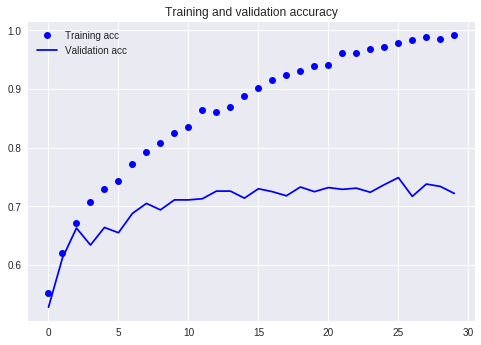

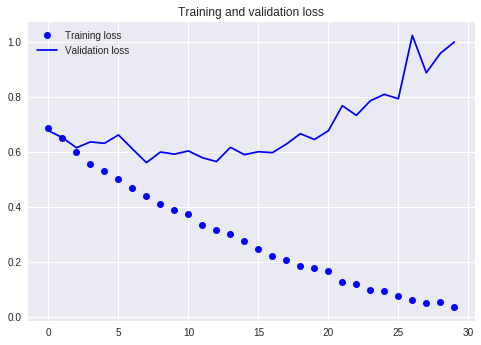

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Nuestro accuracy de train aumenta linealmente con el tiempo, hasta que alcanza casi el 100%, mientras que nuestro accuracy de validación se detiene en un 70-72%.

Nuestra loss de validación alcanza su mínimo después de sólo cinco épocas y luego se detiene, mientras que la loss de entrenamiento sigue disminuyendo linealmente hasta alcanzar casi 0.
Debido a que solo tenemos relativamente pocas samples de entrenamiento (2000), el overfitting será nuestra principal preocupación.


## Data augmentation

El overfitting se debe a que tenemos muy pocas muestras de las que aprender, lo cual nos impide entrenar un modelo capaz de generalizar a nuevos datos.
Dada una cantidad infinita de datos, nuestro modelo estaría expuesto a todos los aspectos posibles de la distribución de datos.

Data augmentation adopta el enfoque de generar más datos de entrenamiento a partir de samples existentes, mediante el "aumento" de las mismas a través de una serie de transformaciones aleatorias que producen imágenes de aspecto creíble.

El objetivo es que, en el momento del entrenamiento, nuestro modelo nunca vea exactamente la misma imagen dos veces. Esto ayuda a que el modelo se exponga a más aspectos de los datos y generalice mejor.


In [0]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

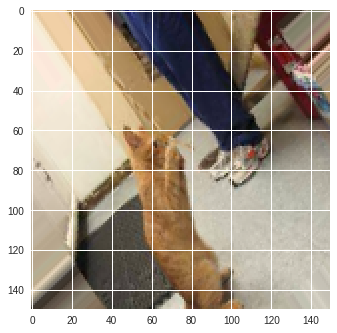

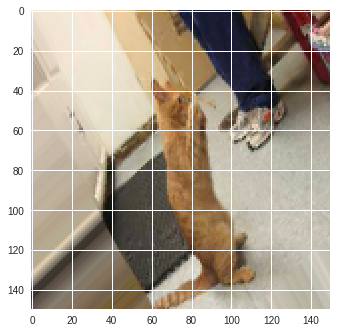

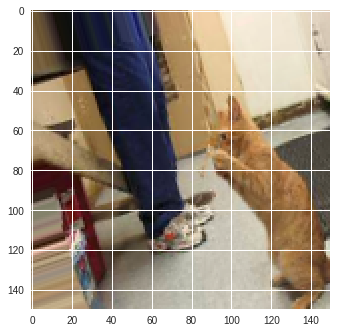

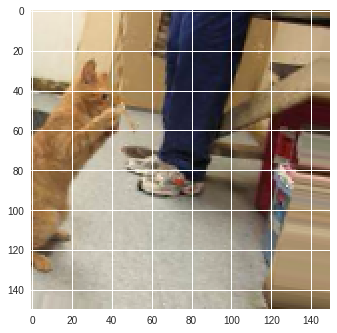

In [0]:
# Este es un modulo con utilidades para preprocesamiento de imagenes
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Elegimos una para "augmentar"
img_path = fnames[3]

# La leemos y la reescalamos
img = image.load_img(img_path, target_size=(150, 150))

# Lo convertimos a un Numpy de forma (150, 150, 3)
x = image.img_to_array(img)

# La reescalamos a (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# El comando .flow() genera batches de imagenes transformadas aleatoriamente.
# Usamos un `break` para cortar el loop en algun momento
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Si entrenamos nuevamente la red, utilizando esta configuración de data augmentation, nuestra red nunca verá dos veces el mismo input.

Sin embargo, los inputs que recibirá estarán fuertemente correlacionados ya que vienen de un número relativamente chico de samples originales. Es decir, no podemos producir muestras nuevas, sino únicamente mezclar las existentes. 

Por lo tanto, es posible que lo que hicimos no sea suficiente para contrarrestar completamente el overfitting.

Para terminar de combatir el overfitting, lo que podemos hacer es agregar una Dropout layer, justo antes del clasificador densamente conectado: 


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Entrenamos la red usando data augmentation y dropout:

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Notemos que la data de validacion no debe ser aumentada!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Directorio de target
        train_dir,
        # Reescalamos todas las imagenes a 150x150
        target_size=(150, 150),
        batch_size=32,
        # Ya que usamos como pérdida binary_crossentropy loss, necesitamos etiquetas binarias
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 37s 369ms/step - loss: 0.6911 - acc: 0.5219 - val_loss: 0.6862 - val_acc: 0.5025
Epoch 2/100
100/100 [==============================] - 33s 332ms/step - loss: 0.6767 - acc: 0.5553 - val_loss: 0.6546 - val_acc: 0.5984
Epoch 3/100
100/100 [==============================] - 33s 334ms/step - loss: 0.6644 - acc: 0.5809 - val_loss: 0.6400 - val_acc: 0.6091
Epoch 4/100
 10/100 [==>...........................] - ETA: 6s - loss: 0.6439 - acc: 0.6219

100/100 [==============================] - 33s 327ms/step - loss: 0.6415 - acc: 0.6181 - val_loss: 0.6253 - val_acc: 0.6396
Epoch 5/100
100/100 [==============================] - 31s 313ms/step - loss: 0.6229 - acc: 0.6503 - val_loss: 0.5941 - val_acc: 0.6675
Epoch 6/100
100/100 [==============================] - 35s 352ms/step - loss: 0.6137 - acc: 0.6637 - val_loss: 0.5892 - val_acc: 0.6631
Epoch 7/100
 72/100 [====================>.........] - ETA: 6s - loss: 0.5868 - acc: 0.6819

100/100 [==============================] - 33s 328ms/step - loss: 0.5855 - acc: 0.6862 - val_loss: 0.6138 - val_acc: 0.6586
Epoch 8/100
100/100 [==============================] - 32s 322ms/step - loss: 0.5876 - acc: 0.6731 - val_loss: 0.5662 - val_acc: 0.6954
Epoch 9/100
100/100 [==============================] - 33s 327ms/step - loss: 0.5845 - acc: 0.6862 - val_loss: 0.5461 - val_acc: 0.7195
Epoch 10/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.5633 - acc: 0.7094

100/100 [==============================] - 32s 321ms/step - loss: 0.5618 - acc: 0.7113 - val_loss: 0.5426 - val_acc: 0.7170
Epoch 11/100
100/100 [==============================] - 34s 339ms/step - loss: 0.5685 - acc: 0.7050 - val_loss: 0.5402 - val_acc: 0.7208
Epoch 12/100
100/100 [==============================] - 33s 329ms/step - loss: 0.5583 - acc: 0.7056 - val_loss: 0.5411 - val_acc: 0.7119
Epoch 13/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.5611 - acc: 0.7046

100/100 [==============================] - 33s 334ms/step - loss: 0.5570 - acc: 0.7081 - val_loss: 0.5255 - val_acc: 0.7341
Epoch 14/100
100/100 [==============================] - 33s 330ms/step - loss: 0.5376 - acc: 0.7287 - val_loss: 0.5663 - val_acc: 0.6973
Epoch 15/100
100/100 [==============================] - 33s 328ms/step - loss: 0.5514 - acc: 0.7037 - val_loss: 0.5402 - val_acc: 0.7259
Epoch 16/100
 85/100 [========================>.....] - ETA: 3s - loss: 0.5390 - acc: 0.7331

100/100 [==============================] - 34s 336ms/step - loss: 0.5414 - acc: 0.7281 - val_loss: 0.5451 - val_acc: 0.7049
Epoch 17/100
100/100 [==============================] - 31s 313ms/step - loss: 0.5326 - acc: 0.7291 - val_loss: 0.4962 - val_acc: 0.7513
Epoch 18/100
100/100 [==============================] - 36s 356ms/step - loss: 0.5357 - acc: 0.7291 - val_loss: 0.6063 - val_acc: 0.6916
Epoch 19/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.5263 - acc: 0.7392

100/100 [==============================] - 33s 334ms/step - loss: 0.5258 - acc: 0.7366 - val_loss: 0.4963 - val_acc: 0.7538
Epoch 20/100
100/100 [==============================] - 33s 331ms/step - loss: 0.5145 - acc: 0.7469 - val_loss: 0.5226 - val_acc: 0.7297
Epoch 21/100
100/100 [==============================] - 33s 326ms/step - loss: 0.5245 - acc: 0.7294 - val_loss: 0.5172 - val_acc: 0.7189
Epoch 22/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.5153 - acc: 0.7463

100/100 [==============================] - 32s 315ms/step - loss: 0.5137 - acc: 0.7444 - val_loss: 0.5063 - val_acc: 0.7487
Epoch 23/100
100/100 [==============================] - 35s 346ms/step - loss: 0.5212 - acc: 0.7328 - val_loss: 0.5143 - val_acc: 0.7487
Epoch 24/100
100/100 [==============================] - 33s 329ms/step - loss: 0.5241 - acc: 0.7344 - val_loss: 0.4971 - val_acc: 0.7614
Epoch 25/100
 83/100 [=======================>......] - ETA: 4s - loss: 0.5141 - acc: 0.7428

100/100 [==============================] - 32s 324ms/step - loss: 0.5085 - acc: 0.7462 - val_loss: 0.4877 - val_acc: 0.7614
Epoch 26/100
100/100 [==============================] - 33s 326ms/step - loss: 0.5063 - acc: 0.7456 - val_loss: 0.5244 - val_acc: 0.7437
Epoch 27/100
100/100 [==============================] - 32s 321ms/step - loss: 0.4851 - acc: 0.7647 - val_loss: 0.4803 - val_acc: 0.7627
Epoch 28/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.4911 - acc: 0.7548

100/100 [==============================] - 33s 333ms/step - loss: 0.4938 - acc: 0.7528 - val_loss: 0.5545 - val_acc: 0.7107
Epoch 29/100
100/100 [==============================] - 33s 327ms/step - loss: 0.4912 - acc: 0.7628 - val_loss: 0.4736 - val_acc: 0.7703
Epoch 30/100
100/100 [==============================] - 33s 330ms/step - loss: 0.4711 - acc: 0.7734 - val_loss: 0.4849 - val_acc: 0.7614
Epoch 31/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.4796 - acc: 0.7757

100/100 [==============================] - 33s 327ms/step - loss: 0.4823 - acc: 0.7731 - val_loss: 0.4452 - val_acc: 0.7887
Epoch 32/100
100/100 [==============================] - 33s 326ms/step - loss: 0.4797 - acc: 0.7609 - val_loss: 0.4371 - val_acc: 0.7938
Epoch 33/100
100/100 [==============================] - 33s 329ms/step - loss: 0.4794 - acc: 0.7709 - val_loss: 0.4514 - val_acc: 0.7951
Epoch 34/100
 85/100 [========================>.....] - ETA: 3s - loss: 0.4669 - acc: 0.7765

100/100 [==============================] - 31s 313ms/step - loss: 0.4624 - acc: 0.7841 - val_loss: 0.4551 - val_acc: 0.7855
Epoch 35/100
100/100 [==============================] - 35s 352ms/step - loss: 0.4651 - acc: 0.7753 - val_loss: 0.4368 - val_acc: 0.7989
Epoch 36/100
100/100 [==============================] - 33s 328ms/step - loss: 0.4642 - acc: 0.7731 - val_loss: 0.4837 - val_acc: 0.7716
Epoch 37/100
 84/100 [========================>.....] - ETA: 3s - loss: 0.4592 - acc: 0.7891

100/100 [==============================] - 32s 321ms/step - loss: 0.4558 - acc: 0.7906 - val_loss: 0.4799 - val_acc: 0.7589
Epoch 38/100
100/100 [==============================] - 32s 321ms/step - loss: 0.4561 - acc: 0.7819 - val_loss: 0.4678 - val_acc: 0.7754
Epoch 39/100
100/100 [==============================] - 32s 318ms/step - loss: 0.4543 - acc: 0.7841 - val_loss: 0.4764 - val_acc: 0.7697
Epoch 40/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.4410 - acc: 0.7965

100/100 [==============================] - 34s 341ms/step - loss: 0.4457 - acc: 0.7903 - val_loss: 0.4281 - val_acc: 0.8071
Epoch 41/100
100/100 [==============================] - 32s 324ms/step - loss: 0.4453 - acc: 0.7819 - val_loss: 0.4436 - val_acc: 0.7855
Epoch 42/100
100/100 [==============================] - 32s 323ms/step - loss: 0.4480 - acc: 0.7897 - val_loss: 0.4323 - val_acc: 0.7893
Epoch 43/100
 85/100 [========================>.....] - ETA: 3s - loss: 0.4391 - acc: 0.7952

100/100 [==============================] - 33s 334ms/step - loss: 0.4421 - acc: 0.7919 - val_loss: 0.4968 - val_acc: 0.7608
Epoch 44/100
100/100 [==============================] - 32s 321ms/step - loss: 0.4362 - acc: 0.7878 - val_loss: 0.4375 - val_acc: 0.7887
Epoch 45/100
100/100 [==============================] - 33s 330ms/step - loss: 0.4382 - acc: 0.7956 - val_loss: 0.4302 - val_acc: 0.8052
Epoch 46/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.4252 - acc: 0.7939

100/100 [==============================] - 32s 323ms/step - loss: 0.4209 - acc: 0.7975 - val_loss: 0.4329 - val_acc: 0.7963
Epoch 47/100
100/100 [==============================] - 33s 331ms/step - loss: 0.4462 - acc: 0.7872 - val_loss: 0.4324 - val_acc: 0.8052
Epoch 48/100
100/100 [==============================] - 32s 322ms/step - loss: 0.4205 - acc: 0.8050 - val_loss: 0.4320 - val_acc: 0.8096
Epoch 49/100
 83/100 [=======================>......] - ETA: 4s - loss: 0.4381 - acc: 0.7888

100/100 [==============================] - 33s 327ms/step - loss: 0.4312 - acc: 0.7938 - val_loss: 0.4444 - val_acc: 0.8058
Epoch 50/100
100/100 [==============================] - 33s 331ms/step - loss: 0.4268 - acc: 0.8081 - val_loss: 0.4530 - val_acc: 0.8065
Epoch 51/100
100/100 [==============================] - 31s 310ms/step - loss: 0.4139 - acc: 0.8072 - val_loss: 0.4424 - val_acc: 0.8065
Epoch 52/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.4312 - acc: 0.7991

100/100 [==============================] - 35s 350ms/step - loss: 0.4275 - acc: 0.8041 - val_loss: 0.4748 - val_acc: 0.7697
Epoch 53/100
100/100 [==============================] - 32s 323ms/step - loss: 0.4347 - acc: 0.8022 - val_loss: 0.4509 - val_acc: 0.7982
Epoch 54/100
100/100 [==============================] - 33s 326ms/step - loss: 0.4237 - acc: 0.7987 - val_loss: 0.4424 - val_acc: 0.7912
Epoch 55/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.4148 - acc: 0.8118

100/100 [==============================] - 33s 326ms/step - loss: 0.4125 - acc: 0.8122 - val_loss: 0.5310 - val_acc: 0.7481
Epoch 56/100
100/100 [==============================] - 32s 318ms/step - loss: 0.4081 - acc: 0.8078 - val_loss: 0.4847 - val_acc: 0.7989
Epoch 57/100
100/100 [==============================] - 35s 346ms/step - loss: 0.4051 - acc: 0.8103 - val_loss: 0.4261 - val_acc: 0.8109
Epoch 58/100
 85/100 [========================>.....] - ETA: 3s - loss: 0.4027 - acc: 0.8125

100/100 [==============================] - 33s 332ms/step - loss: 0.4013 - acc: 0.8153 - val_loss: 0.4970 - val_acc: 0.7824
Epoch 59/100
100/100 [==============================] - 33s 330ms/step - loss: 0.3970 - acc: 0.8156 - val_loss: 0.4463 - val_acc: 0.8020
Epoch 60/100
100/100 [==============================] - 33s 331ms/step - loss: 0.3960 - acc: 0.8172 - val_loss: 0.4932 - val_acc: 0.7957
Epoch 61/100
 84/100 [========================>.....] - ETA: 4s - loss: 0.4086 - acc: 0.8103

100/100 [==============================] - 33s 333ms/step - loss: 0.4129 - acc: 0.8062 - val_loss: 0.4432 - val_acc: 0.8052
Epoch 62/100
100/100 [==============================] - 33s 333ms/step - loss: 0.4005 - acc: 0.8175 - val_loss: 0.4322 - val_acc: 0.7893
Epoch 63/100
100/100 [==============================] - 33s 327ms/step - loss: 0.3960 - acc: 0.8184 - val_loss: 0.4426 - val_acc: 0.8135
Epoch 64/100
 69/100 [===================>..........] - ETA: 7s - loss: 0.3914 - acc: 0.8270

Salvamos el nuevo modelo:

In [0]:
model.save('cats_and_dogs_small_2.h5')

Ploteamos los resultados de vuelta:

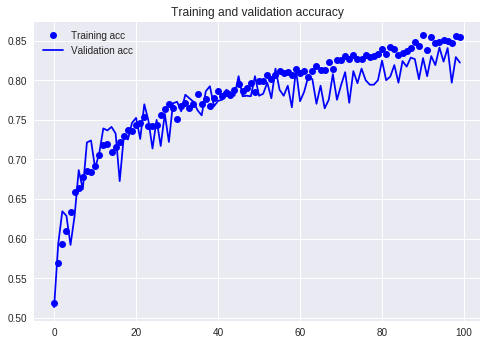

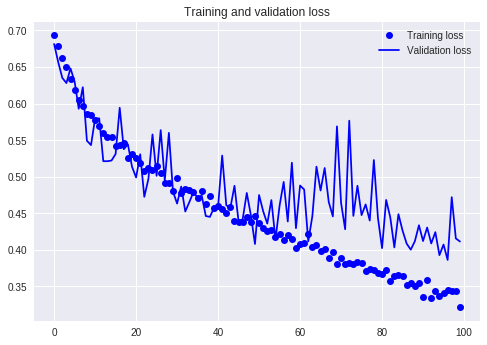

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Gracias al data augmentation y el drop out layer, ya no estamos sobreajustando: las curvas de entrenamiento siguen de cerca a las curvas de validación.
Ahora podemos alcanzar un accuracy del 82%, una mejora relativa del 15% sobre el modelo no regularizado.

Aprovechando aún más las técnicas de regularización y ajustando los parámetros de la red (como el número de filtros por capa de convolución o el número de capas en la red), podremos obtener una precisión aún mayor, probablemente hasta 86-87%.

Sin embargo, sería muy difícil ir más allá simplemente entrenando nuestro propio convnet desde cero, sencillamente porque tenemos muy pocos datos para trabajar.
Como un próximo paso para mejorar nuestra performance en este problema, tendremos que aprovechar un modelo pre-entrenado.


In [0]:
!ls -lh

total 840M
drwxr-xr-x 5 root root 4.0K Mar 19 21:36 cats_and_dogs_small
-rw-r--r-- 1 root root  27M Mar 19 21:53 cats_and_dogs_small_1.h5
-rw-r--r-- 1 root root  27M Mar 19 22:44 cats_and_dogs_small_2.h5
drwxr-xr-x 1 root root 4.0K Mar 19 19:14 datalab
-rw-r--r-- 1 root root 787M Feb 10  2017 kagglecatsanddogs_3367a.zip
drwxr-xr-x 4 root root 4.0K Mar 19 21:42 kaggle_original_data
-rw-r--r-- 1 root root  35K Feb 10  2017 MSR-LA - 3467.docx
drwxr-xr-x 4 root root 4.0K Mar 19 20:50 PetImages
-rw-r--r-- 1 root root  104 Feb 10  2017 readme[1].txt


In [0]:
from google.colab import files
files.download('cats_and_dogs_small_1.h5')